# Predictive Model to Classify Network Attacks



### Revenue streams are increasingly derived from online channels.




    1. E-store and marketing media has greatest reach via internet / mobile devices
    
    
    2. Online subscription model and electronic delivery of services and content deriving greater share.
    
    
    3. Greatly facilitated by online payment methods.



### Cyber attacks carry real reputational and business costs.




    1. Denial of service (DOS) attacks slow down traffic. Customers may switch to competitors.


    2. Penetration attacks risk private customer information, litigation risks.


    3. Other commercial sensitive information e.g. product prices, discounts

### Business Objective




    1. Early detection and automated response to malicious network traffic. Malicious traffic 
    should be blocked before an attack can fully develop.
    
    
    2. Reduce the time needed and costs of responding to the aftermath of malicious incidents.
    
    
    3. Reduce the time needed and costs of identifying future threats.



In [20]:
#loading and importing data 
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy

from scipy import stats
from collections import defaultdict
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, zero_one_loss
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import make_scorer, roc_auc_score

warnings.filterwarnings("ignore")
# Display plots in-notebook
%matplotlib inline


In [2]:
# add the column labels
columns = ([
'duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

### Exploratory data analysis

In [39]:
# Import the train and test sets
df_train=pd.read_csv('./data/KDDTrain+.txt',header=None,names=columns)
df_test=pd.read_csv('./data/KDDTest+.txt',header=None,names=columns)

# Test set has 22,544 rows.
print(f"Test set contains {df_test.shape[0]} rows and {df_test.shape[1]} columns")

# No duplicate values detected
print(f"Test set contains {df_test.duplicated().sum()} duplicates.")

Test set contains 22544 rows and 43 columns
Test set contains 0 duplicates.


In [37]:
# Test set does not contain null values
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [40]:
# Train set has 125,973 rows.
print(f"Train set contains {df_train.shape[0]} rows and {df_train.shape[1]} columns")

# No duplicate values detected
print(f"Test set contains {df_train.duplicated().sum()} duplicates.")

Train set contains 125973 rows and 43 columns
Test set contains 0 duplicates.


In [41]:
# Train set does not contain null values.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

duration                          AxesSubplot(0.125,0.837584;0.227941x0.0424157)
src_bytes                      AxesSubplot(0.398529,0.837584;0.227941x0.0424157)
dst_bytes                      AxesSubplot(0.672059,0.837584;0.227941x0.0424157)
land                              AxesSubplot(0.125,0.786685;0.227941x0.0424157)
wrong_fragment                 AxesSubplot(0.398529,0.786685;0.227941x0.0424157)
urgent                         AxesSubplot(0.672059,0.786685;0.227941x0.0424157)
hot                               AxesSubplot(0.125,0.735787;0.227941x0.0424157)
num_failed_logins              AxesSubplot(0.398529,0.735787;0.227941x0.0424157)
logged_in                      AxesSubplot(0.672059,0.735787;0.227941x0.0424157)
num_compromised                   AxesSubplot(0.125,0.684888;0.227941x0.0424157)
root_shell                     AxesSubplot(0.398529,0.684888;0.227941x0.0424157)
su_attempted                   AxesSubplot(0.672059,0.684888;0.227941x0.0424157)
num_root                    

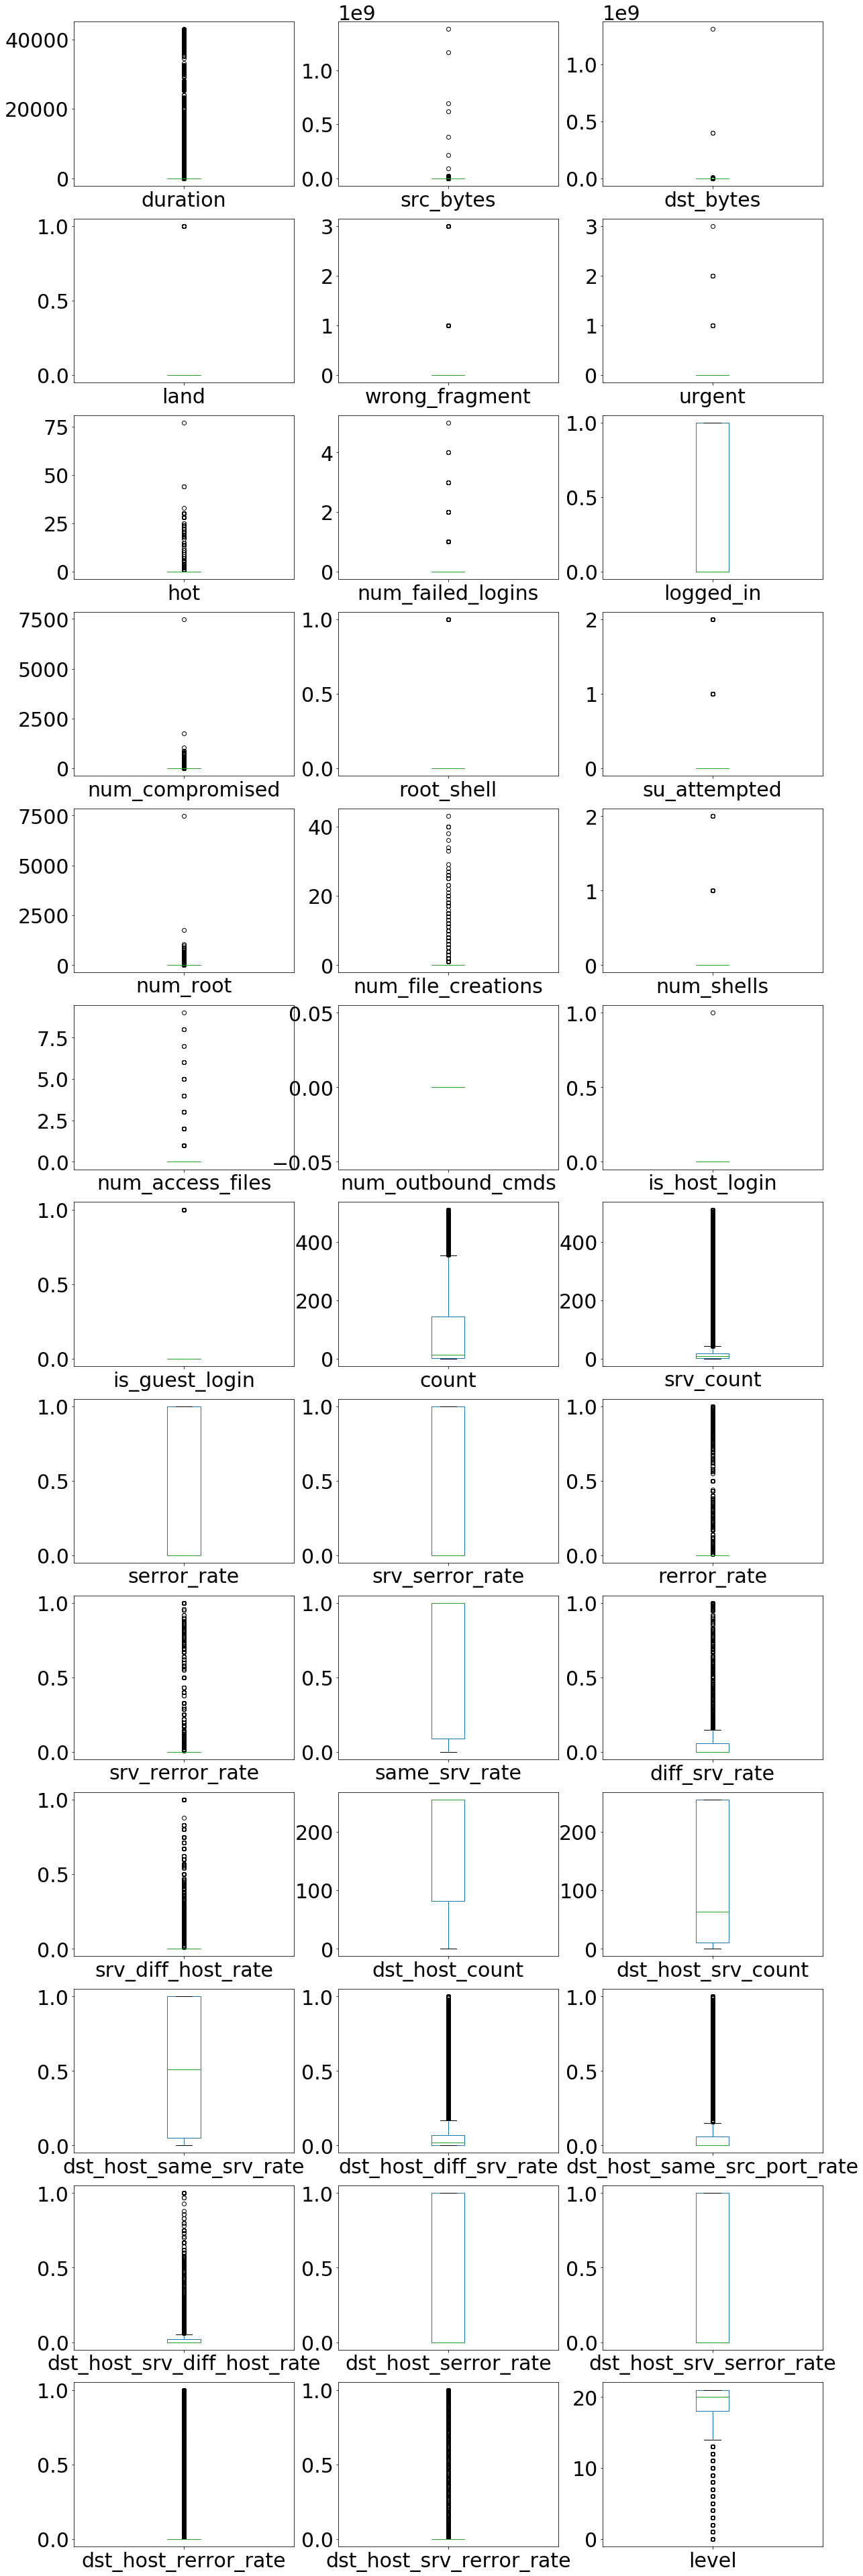

In [44]:
# Check for skewness and outliers
df_train.plot(kind='box', subplots=1, layout=(15,3), figsize=(20,80))

In [45]:
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


### Approach to building the classifier


1. Supervised learning approach leverages labelled data in NSL-KDD.
   - Contains network traffic logs
   - Training data contains 22 types of attack traffic
   - Test data contains 37 types of attack traffic (15 of which are not in the Test data)


2. Use NSL-KDD data to train, test and shortlist selected classification models.
   - Decision Tree Classifier
   - K Nearest Neighbours
   - Linear Support Vector Classifier (SVC)



### Assign attack descriptions to one of 5 major classes



|S/N | Class | Description|
|:---|:---|:---|
|1. | **dos** | Denial of service|
|2. | **r2l** | Remote to Local user (Unauthorized accesses from remote servers)|
|3. | **u2r** | User to Root (Privilege escalation attempts)|
|4. | **probe** | Brute-force probing attacks|
|5. | **benign** | Normal internet traffic |



In [4]:
category = {
        'benign': ['normal'],
        'probe':  ['nmap', 'ipsweep', 'portsweep', 'satan',
                   'mscan', 'saint', 'worm'],
        'r2l':    ['ftp_write', 'guess_passwd', 'snmpguess',
                   'imap', 'spy', 'warezclient', 'warezmaster',
                   'multihop', 'phf', 'imap', 'named', 'sendmail',
                   'xlock', 'xsnoop', 'worm'],
        'u2r':    ['ps', 'buffer_overflow', 'perl', 'rootkit',
                   'loadmodule', 'xterm', 'sqlattack', 'httptunnel'],
        'dos':    ['apache2', 'back', 'mailbomb', 'processtable',
                   'snmpgetattack', 'teardrop', 'smurf', 'land',
                   'neptune', 'pod', 'udpstorm']
    }

In [5]:
# Change the format so that attack names in the data can be mapped to one of the category classes
attack_mapping = dict((v,k) for k in category for v in category[k])
# Map to the train and test DataFrames
df_train['attack_category'] = df_train['attack'].map(lambda x: attack_mapping[x])
df_test['attack_category'] = df_test['attack'].map(lambda x: attack_mapping[x])

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64


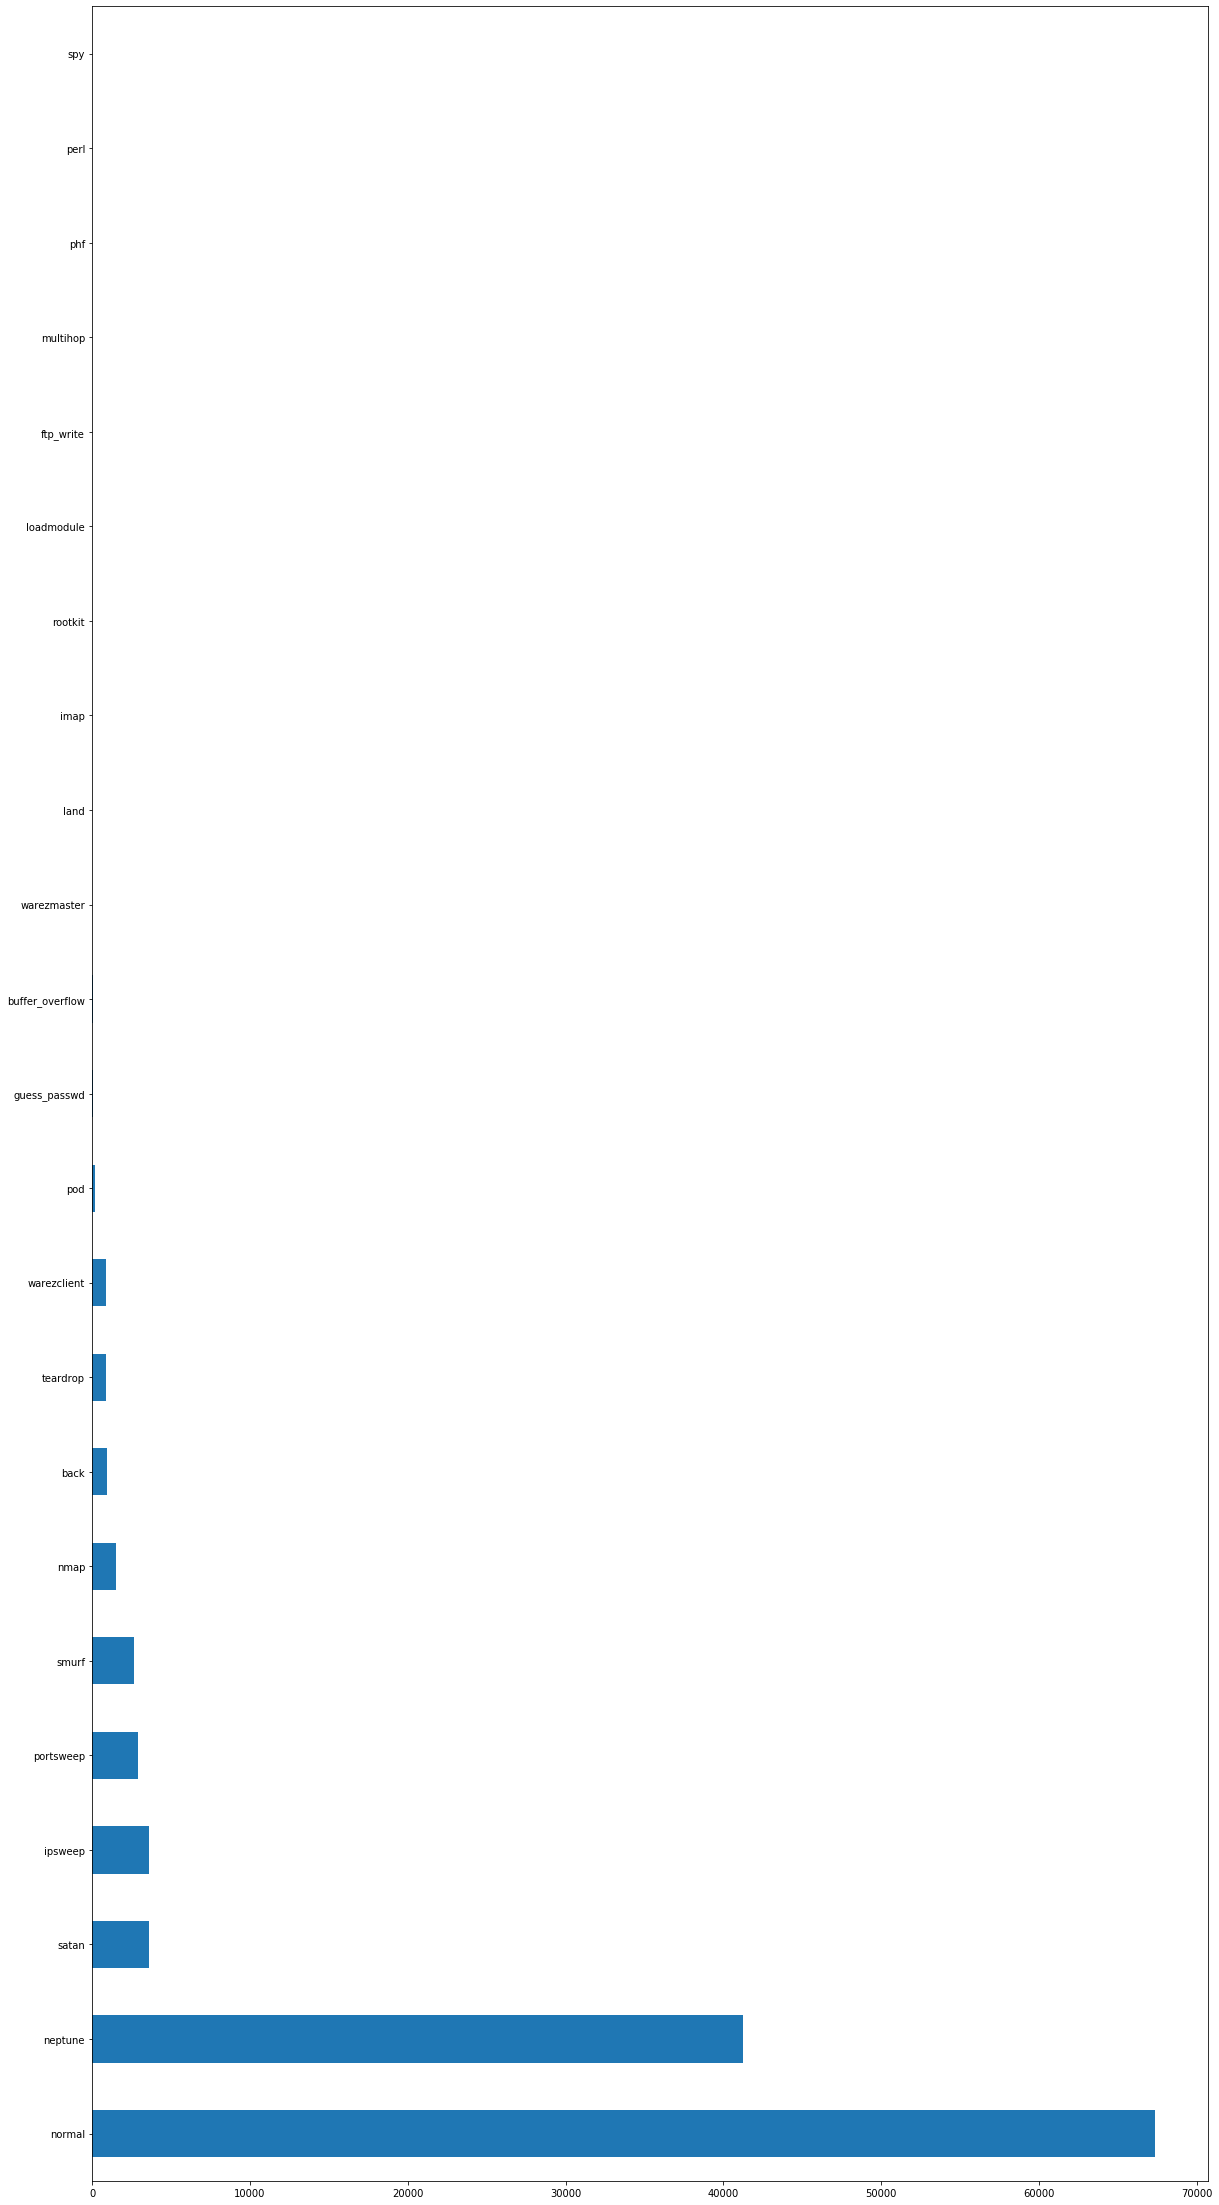

In [6]:
train_attack_types = df_train['attack'].value_counts()
train_attack_cats = df_train['attack_category'].value_counts()

print(train_attack_types)
train_attack_types.plot(kind='barh', figsize=(20,40))
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)


### Challenges encountered


1. The distributions of each feature vary widely. E.g. the respective means and standard deviations of `src_bytes` is about 7 times larger than `num_failed_logins`.


2. Data is heavily imbalanced by large numbers of "benign" traffic. High chance that models will learn a lot more about the benign and other dominant classes.


3. Without proper standardisation / normalisation and oversampling methods, these data characteristics are likely to introduce alot of bias into the predictive model.

benign    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: attack_category, dtype: int64


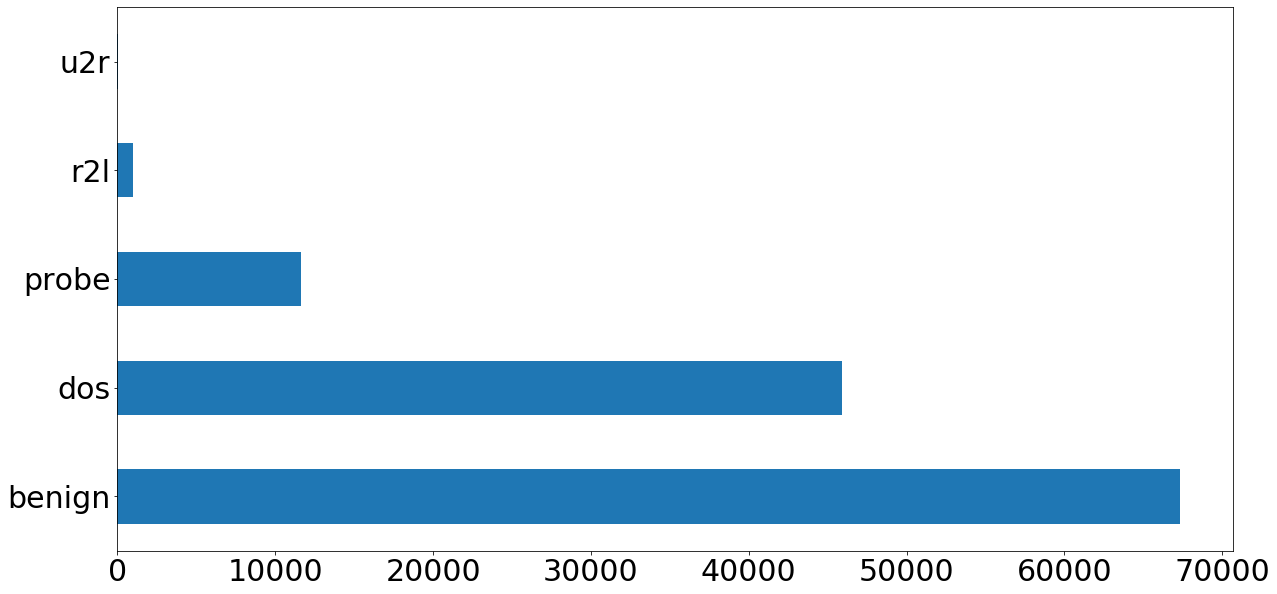

In [7]:
# Distribution of attack categories
# The classes in the dataset are tremendously imbalanced.
# If we ignore the imbalance, there is a chance that the model will learn a lot more about the benign and dos classes 
# This may result in an undesirable bias in the classifier.
print(train_attack_cats)
train_attack_cats.plot(kind='barh', figsize=(20,10))

### Split the train and test DataFrames into data and labels

In [8]:
# Training set
Y_train = df_train['attack_category']
x_train = df_train.drop(['attack', 'attack_category'], axis=1)

# Test set
Y_test = df_test['attack_category']
x_test = df_test.drop(['attack', 'attack_category'], axis=1)


### Pre-Processing: One Hot Encoding Categorical variables

In [9]:
# kddcup.names is a lookup table to determine whether the data is continuous or categorical
wdir = os.getcwd()
path = os.path.join(wdir, 'data', 'kddcup.names')

# Prepare categorical/dummy variables for encoding
feature_names = defaultdict(list)

with open(path, 'r') as f:
    for line in f.readlines()[1:]:
        name, nature = line.strip()[:-1].split(': ')
        feature_names[nature].append(name)

# feature_names        
'''
{'continuous': ['duration',
              'src_bytes',
              'dst_bytes',
              'wrong_fragment',
               ...
               ...
              'dst_host_srv_rerror_rate'],
'symbolic': ['protocol_type',
              'service',
              'flag',
              'land',
              'logged_in',
              'is_host_login',
              'is_guest_login']})
'''

"\n{'continuous': ['duration',\n              'src_bytes',\n              'dst_bytes',\n              'wrong_fragment',\n               ...\n               ...\n              'dst_host_srv_rerror_rate'],\n'symbolic': ['protocol_type',\n              'service',\n              'flag',\n              'land',\n              'logged_in',\n              'is_host_login',\n              'is_guest_login']})\n"

In [10]:
# Concatenate DataFrames
# Typically not ok to perform preprocessing actions on a combination of training and test data.
# In this case, we are not not mixing elements of the training and test sets. So it should be safe.
combined_raw_df = pd.concat([x_train, x_test])

# Keep track of continuous, binary and nominal features

# Continuous features
continuous_features_list = feature_names['continuous']
continuous_features_list.remove('root_shell')
# print(continuous_features_list)

# Binary features
binary_features_list = [
    'land',
    'logged_in',
    'root_shell',
    'su_attempted',
    'is_host_login',
    'is_guest_login',
]

# Nominal features
nominal_features_list = list(
set(feature_names['symbolic']) - set(binary_features_list)
)

# Generate dummy variables
# pd.get_dummies() applies one-hot encoding to categorical (nominal) variables
combined_df = pd.get_dummies(combined_raw_df,
                            columns=feature_names['symbolic'],
                             drop_first=True
                            )
# print(combined_df.head(10))

In [11]:
# Seperate into training and test sets again
x_train_cd = combined_df[:len(x_train)]
x_test_cd = combined_df[len(x_train):]
x_train_cd.describe()
# Notice that the distributions for each feature vary widely.
# For example, the mean of src_bytes is much larger than the mean of num_failed_logins
# Without standardisation/normalisation, the src_bytes feature would dominate, causing the model to 
# potentially miss out important information in the num_failed_logins feature.


,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,land_1,logged_in_1,is_host_login_1,is_guest_login_1
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.022687,0.000111,0.204409,0.001222,0.279250,0.001342,0.001103,...,0.276655,0.002897,0.001008,0.000389,0.594929,0.002151,0.000198,0.395736,0.000008,0.009423
std,2604.51531,5.870331e+06,4.021269e+06,0.253530,0.014366,2.149968,0.045239,23.942042,0.036603,0.045154,...,0.447346,0.053750,0.031736,0.019719,0.490908,0.046332,0.014086,0.489010,0.002817,0.096612
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,3.000000,3.000000,77.000000,5.000000,7479.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Experimentation with classification models

The predictive performance of DecisionTreeClassifier, KNN and Linear SVC classification models were evaluated.


Experimented with using the classification models to predict attacks as a baseline before using oversampling techniques on the Train data set.


Oversampling techniques did yield better model performance.

In [12]:
# Standardization rescales a data series to have a mean of 0 and a standard deviation of 1 (unit variance).
# Fit StandardScaler to the training data
standard_scaler = StandardScaler().fit(x_train_cd[continuous_features_list])
# Standardise training data
x_train_cd[continuous_features_list] = standard_scaler.transform(x_train_cd[continuous_features_list])
# Standardise test data with scaler fitted to training data
x_test_cd[continuous_features_list] = standard_scaler.transform(x_test_cd[continuous_features_list])

In [13]:
# Supervised learning. Trying out a simple DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train_cd, Y_train)
pred_y = classifier.predict(x_test_cd)
results_sdtc = confusion_matrix(Y_test, pred_y)
error_sdtc = zero_one_loss(Y_test, pred_y)

# In the confusion matrix, the diagonal values (from upper left to lower right) 
# are the counts of correctly classified samples.
# All the values in the matrix add up to 22,544, which is the size of the test set.
# Each row represents the true class, and each column represents the predicted class.
# For instance, the number in the first row and fifth column represents the number of samples that 
# are actually of class 0 that were classified as class 4
# benign = 0, dos = 1, probe = 2, r2l = 3, and u2r = 4

print("Confusion Matrix (Simple Decision Tree Classifier)")
print(results_sdtc)
print("Error")
print(error_sdtc)

# All values in the confusion matrix add up to 22,544. This is the size of the test set.
# The confusion matrix shows only 2.8% of benign test samples were wrongly classified
# benign = [9440, 55, 215, 1, 0]
# foo = sum(benign)
# bar = sum(benign[1:])
# foobar = (bar / foo)*100
# foobar # = 2.79%

Confusion Matrix (Simple Decision Tree Classifier)
[[9440   55  215    1    0]
 [1276 5877  483    0    0]
 [ 635  207 1579    0    0]
 [2149    5   79  290   53]
 [ 133    0    7   41   19]]
Error
0.2368257629524485


In [14]:
# We see that 43% of the test data belongs to the benign class, whereas 0.8% belongs to u2r class
# The confusion matrix shows us that although only 2.8% of benign test samples were wrongly classified, 
# 62% of all test samples were classified as benign. 

# sum_all_benigns = sum([results_sdtc[x][0] for x in range(0, len(results_sdtc))])
# sum_all_benigns/22154 # = 0.6153741987902862

# It points to the possiblity that we have trained a classifier that is more biased towards 
# classifying samples into the benign class.


# Similar to the training set, the sample distribution is not balanced across categories
Y_test.value_counts().apply(lambda x: x/float(len(Y_test)))

benign    0.430758
dos       0.338715
r2l       0.114265
probe     0.107390
u2r       0.008872
Name: attack_category, dtype: float64

In [15]:
# Try an alternative classification model to see if the choice of model was the cause of the bias
# Now using k-nearest neighbors classifier
classifier = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
classifier.fit(x_train_cd, Y_train)
pred_y = classifier.predict(x_test_cd)
results_knn = confusion_matrix(Y_test, pred_y)
error_knn = zero_one_loss(Y_test, pred_y)

print("Confusion Matrix (KNN)")
print(results_knn)
print("Error")
print(error_knn)

Confusion Matrix (KNN)
[[9388   66  220   29    8]
 [1015 6303  162  105   51]
 [ 331  212 1870    8    0]
 [1486  451  248  258  133]
 [  35    2  104   23   36]]
Error
0.20799325762952448


In [16]:
# Trying linear support vector classifier
classifier = LinearSVC()
classifier.fit(x_train_cd, Y_train)
pred_y = classifier.predict(x_test_cd)
results_svc = confusion_matrix(Y_test, pred_y)
error_svc = zero_one_loss(Y_test, pred_y)

print("Confusion Matrix (LinearSVC)")
print(results_svc)
print("Error")
print(error_svc)

Confusion Matrix (LinearSVC)
[[8938   97  672    4    0]
 [1473 5958  202    3    0]
 [ 273  128 2006   14    0]
 [2172    5  156  223   20]
 [ 117    2   10   38   33]]
Error
0.23891057487579848


### Handling class imbalance


### Oversampling with SMOTE

In [17]:
# Over sampling using imbalanced learn to deal with Class Imbalance
# Print out the original training data class distribution.
print(pd.Series(Y_train).value_counts())

benign    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: attack_category, dtype: int64


In [18]:
# Apply SMOTE oversampling to the training data
# 'auto' parameter will oversample all non-majority classes to be the same size as the majority class
sm = SMOTE(sampling_strategy='auto', random_state=0)
x_train_sm, Y_train_sm = sm.fit_resample(x_train_cd, Y_train)
print('Training data class distribution after first SMOTE')
print(pd.Series(Y_train_sm).value_counts())

Training data class distribution after first SMOTE
r2l       67343
probe     67343
benign    67343
u2r       67343
dos       67343
Name: attack_category, dtype: int64


In [19]:
# Reattempt classification on oversampled data

# Simple DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train_sm, Y_train_sm)
pred_y = classifier.predict(x_test_cd)
sm_results_sdtc = confusion_matrix(Y_test, pred_y)
sm_error_sdtc = zero_one_loss(Y_test, pred_y)

print("Confusion Matrix (Simple Decision Tree Classifier)")
print(sm_results_sdtc)
print("Error")
print(sm_error_sdtc)

# k-nearest neighbors
classifier = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
classifier.fit(x_train_sm, Y_train_sm)
pred_y = classifier.predict(x_test_cd)
sm_results_knn = confusion_matrix(Y_test, pred_y)
sm_error_knn = zero_one_loss(Y_test, pred_y)

print("Confusion Matrix (KNN)")
print(sm_results_knn)
print("Error")
print(sm_error_knn)

# Linear support vector classifier
classifier = LinearSVC()
classifier.fit(x_train_sm, Y_train_sm)
pred_y = classifier.predict(x_test_cd)
sm_results_svc = confusion_matrix(Y_test, pred_y)
sm_error_svc = zero_one_loss(Y_test, pred_y)

print("Confusion Matrix (LinearSVC)")
print(sm_results_svc)
print("Error")
print(sm_error_svc)

Confusion Matrix (Simple Decision Tree Classifier)
[[9449   66  190    6    0]
 [1492 5642  499    3    0]
 [ 527  168 1687   33    6]
 [1534   10  287  697   48]
 [  36    0  102   34   28]]
Error
0.2236071682044003
Confusion Matrix (KNN)
[[9385   63  227   24   12]
 [1013 6296  174   98   55]
 [ 214  192 2006    9    0]
 [1439  380  240  354  163]
 [  16    0  114   45   25]]
Error
0.19863378282469835
Confusion Matrix (LinearSVC)
[[8931   62  698   14    6]
 [1578 5845  206    4    3]
 [ 233   99 1927  138   24]
 [1300    2   46  795  433]
 [ 118    2    2   42   36]]
Error
0.22223207948899926


### Experiment results

| Model | Accuracy Before SMOTE | Accuracy After SMOTE |
|:----|:----|:----|
|Decision Tree|77%|78%|
|K Nearest Neighbours|80%|81%|
|Linear SVC|77%|78%|


K Nearest Neighbours classification consistently achieves the best predictive results.